In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 12.0 MB/s 
     |████████████████████████████████| 17.9 MB 540 kB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 1.3 MB 36.8 MB/s 
     |████████████████████████████████| 167 kB 73.6 MB/s 
     |████████████████████████████████| 262 kB 65.9 MB/s 
     |████████████████████████████████| 2.0 MB 55.1 MB/s 
     |████████████████████████████████| 125 kB 48.2 MB/s 
     |████████████████████████████████| 10.4 MB 51.9 MB/s 
     |████████████████████████████████| 1.7 MB 35.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 6.8 MB 51.4 MB/s 
     |████████████████████████████████|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import os
from tqdm import tqdm

BASE_DIR = '/content/drive/Shareddrives/DAB 경진대회/크롤링/csv저장'
files = os.listdir(BASE_DIR)
completeData = pd.DataFrame()

for file in files:
  raw_data = pd.read_csv(f"{BASE_DIR}/{file}")
  raw_data.columns = ['date','size','price','name','brand','transaction_t', 'scrab','likes','releasetDate', 'color','releasePrice']
  data = raw_data['date'].value_counts().reset_index()
  data = data.sort_values(by = ['index']).reset_index(drop=True)

  groups = raw_data.groupby(['date'])
  groupmean = groups.mean()['price']
  groupmin = groups.min()['price']
  groupmax = groups.max()['price']

  groupdata = pd.DataFrame([groupmean, groupmin, groupmax]).transpose()
  groupdata.columns=['mean', 'min', 'max']

  data['mean'] = groupdata['mean'].values
  data['min'] = groupdata['min'].values
  data['max'] = groupdata['max'].values
  data['cumcount'] = [i for i in range(len(data))]
  cumtrans = []
  for i in range(len(data)):
    if i== 0 : cumtrans.append(data.iloc[i, 1])
    else:
      cumtrans.append(cumtrans[i-1]+data.iloc[i,1])

  data['cumtrans'] = cumtrans

  data.columns = ['date', 'todaycount', 'mean', 'min', 'max','cumdate', 'cumtrans']

  duration = []
  targetprice = []

  newdata = data.copy()
  for i in tqdm(range(len(data)-1)):
    duration.append(0)
    targetprice.append(data.iloc[i,2])
    for j in range(10):
      newdata = newdata.append(data.loc[i])
      duration.append(j+1)
      try:
        targetprice.append(data.iloc[i+j,2])
      except:
        targetprice.append(-1)

  newdata = newdata.sort_values(by = ['date']).reset_index(drop=True)
  duration.append(0)
  targetprice.append(data.iloc[len(data)-1,2])
  newdata['duration'] = duration
  newdata['targetprice'] = targetprice  
  newdata = newdata.loc[newdata['duration']!=0,:]
  newdata.reset_index(drop=True)
  newdata['size'] = [raw_data['size'][0]] * len(newdata)

  completeData = pd.concat([completeData, newdata])


0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 84/84 [00:02<00:00, 30.62it/s]


IsADirectoryError: ignored

# 하나 가지고 테스트 한 내역(여긴 무시)





In [ ]:
groups = raw_data.groupby(['date'])
groupmean = groups.mean()['price']
groupmin = groups.min()['price']
groupmax = groups.max()['price']

groupdata = pd.DataFrame([groupmean, groupmin, groupmax]).transpose()
groupdata.columns=['mean', 'min', 'max']

In [ ]:
groupdata

mean       min       max
date                                       
22/03/30  247200.000000  238000.0  252000.0
22/03/31  244875.000000  241000.0  249000.0
22/04/01  250142.857143  241000.0  256000.0
22/04/02  246500.000000  246000.0  247000.0
22/04/03  249666.666667  247000.0  255000.0
22/04/04  251750.000000  239000.0  261000.0
22/04/05  253000.000000  249000.0  260000.0
22/04/06  249714.285714  242000.0  254000.0
22/04/08  250500.000000  249000.0  254000.0
22/04/09  266500.000000  255000.0  278000.0
22/04/10  254500.000000  246000.0  258000.0
22/04/11  250333.333333  245000.0  256000.0
22/04/12  257200.000000  250000.0  271000.0
22/04/13  250000.000000  250000.0  250000.0
22/04/14  254888.888889  249000.0  269000.0
22/04/15  250000.000000  250000.0  250000.0
22/04/16  244500.000000  232000.0  251000.0
22/04/17  236333.333333  231000.0  245000.0
22/04/18  256000.000000  256000.0  256000.0
22/04/19  251750.000000  243000.0  259000.0
22/04/20  240000.000000  240000.0  240000.0
22/04/21  241000.000000  240000.0  242000.0
22/04/22  248000.000000  238000.0  258000.0
22/04/24  243666.666667  237000.0  256000.0
22/04/25  249857.142857  236000.0  257000.0
22/04/26  249333.333333  240000.0  262000.0
22/04/27  248000.000000  235000.0  263000.0
22/04/28  234500.000000  234000.0  235000.0
22/04/29  242750.000000  233000.0  265000.0
22/04/30  244000.000000  230000.0  267000.0
22/05/02  230200.000000  218000.0  253000.0
22/05/03  251000.000000  249000.0  253000.0
22/05/04  224666.666667  216000.0  239000.0
22/05/05  218333.333333  202000.0  229000.0
22/05/07  214875.000000  206000.0  245000.0
22/05/08  249000.000000  249000.0  249000.0
22/05/09  219000.000000  210000.0  225000.0
22/05/10  233000.000000  229000.0  245000.0
22/05/11  237250.000000  230000.0  245000.0
22/05/12  226117.647059  222000.0  237000.0
22/05/13  219250.000000  214000.0  236000.0
22/05/14  223625.000000  215000.0  234000.0
22/05/15  221454.545455  216000.0  233000.0
22/05/16  220571.428571  211000.0  238000.0
22/05/17  219888.888889  212000.0  223000.0
22/05/18  226625.000000  211000.0  249000.0
22/05/19  227583.333333  215000.0  256000.0
22/05/20  222500.000000  218000.0  227000.0
22/05/21  220500.000000  219000.0  222000.0
22/05/22  233000.000000  222000.0  250000.0
22/05/23  230235.294118  223000.0  240000.0
22/05/24  229666.666667  223000.0  245000.0
22/05/25  238500.000000  238000.0  239000.0
22/05/26  233200.000000  226000.0  237000.0
22/05/27  227250.000000  226000.0  229000.0
22/05/28  231000.000000  227000.0  235000.0
22/05/29  233333.333333  227000.0  237000.0
22/05/30  230400.000000  226000.0  233000.0
22/05/31  230250.000000  227000.0  233000.0
22/06/01  229500.000000  226000.0  234000.0
22/06/02  229000.000000  226000.0  234000.0
22/06/03  228000.000000  226000.0  230000.0
22/06/04  226500.000000  224000.0  229000.0
22/06/05  229200.000000  225000.0  231000.0
22/06/06  231000.000000  229000.0  232000.0
22/06/07  226500.000000  222000.0  233000.0
22/06/08  225200.000000  216000.0  237000.0
22/06/10  222000.000000  216000.0  235000.0
22/06/11  240333.333333  238000.0  244000.0
22/06/12  224000.000000  224000.0  224000.0
22/06/13  225000.000000  225000.0  225000.0
22/06/14  249000.000000  249000.0  249000.0
22/06/15  231000.000000  224000.0  250000.0
22/06/16  233750.000000  230000.0  235000.0
22/06/17  224000.000000  224000.0  224000.0
22/06/18  227000.000000  225000.0  229000.0
22/06/20  219250.000000  219000.0  220000.0
22/06/22  222333.333333  220000.0  225000.0
22/06/23  219000.000000  219000.0  219000.0
22/06/24  223000.000000  223000.0  223000.0
22/06/26  218666.666667  217000.0  220000.0
22/06/27  219000.000000  219000.0  219000.0
22/06/28  216000.000000  213000.0  219000.0
22/07/01  215000.000000  211000.0  217000.0
22/07/02  219500.000000  218000.0  221000.0

In [ ]:
data['mean'] = groupdata['mean'].values
data['min'] = groupdata['min'].values
data['max'] = groupdata['max'].values
cumtrans = []
for i in range(len(data)):
  if i== 0 : cumtrans.append(data.iloc[i, 1])
  else:
    cumtrans.append(cumtrans[i-1]+data.iloc[i,1])

data['cumtrans'] = cumtrans

data.columns = ['date', 'todaycount', 'mean', 'min', 'max','cumdate', 'cumtrans']

In [ ]:
data

date  todaycount           mean       min       max  cumdate  \
0   22/03/30           5  247200.000000  238000.0  252000.0        0   
1   22/03/31           8  244875.000000  241000.0  249000.0        1   
2   22/04/01           7  250142.857143  241000.0  256000.0        2   
3   22/04/02           2  246500.000000  246000.0  247000.0        3   
4   22/04/03           6  249666.666667  247000.0  255000.0        4   
5   22/04/04           8  251750.000000  239000.0  261000.0        5   
6   22/04/05           3  253000.000000  249000.0  260000.0        6   
7   22/04/06           7  249714.285714  242000.0  254000.0        7   
8   22/04/08           4  250500.000000  249000.0  254000.0        8   
9   22/04/09           2  266500.000000  255000.0  278000.0        9   
10  22/04/10           6  254500.000000  246000.0  258000.0       10   
11  22/04/11           3  250333.333333  245000.0  256000.0       11   
12  22/04/12           5  257200.000000  250000.0  271000.0       12   
13  22/04/13           1  250000.000000  250000.0  250000.0       13   
14  22/04/14           9  254888.888889  249000.0  269000.0       14   
15  22/04/15           1  250000.000000  250000.0  250000.0       15   
16  22/04/16           4  244500.000000  232000.0  251000.0       16   
17  22/04/17           3  236333.333333  231000.0  245000.0       17   
18  22/04/18           1  256000.000000  256000.0  256000.0       18   
19  22/04/19           4  251750.000000  243000.0  259000.0       19   
20  22/04/20           1  240000.000000  240000.0  240000.0       20   
21  22/04/21           2  241000.000000  240000.0  242000.0       21   
22  22/04/22           2  248000.000000  238000.0  258000.0       22   
23  22/04/24           3  243666.666667  237000.0  256000.0       23   
24  22/04/25           7  249857.142857  236000.0  257000.0       24   
25  22/04/26           3  249333.333333  240000.0  262000.0       25   
26  22/04/27           3  248000.000000  235000.0  263000.0       26   
27  22/04/28           2  234500.000000  234000.0  235000.0       27   
28  22/04/29           4  242750.000000  233000.0  265000.0       28   
29  22/04/30           3  244000.000000  230000.0  267000.0       29   
30  22/05/02           5  230200.000000  218000.0  253000.0       30   
31  22/05/03           2  251000.000000  249000.0  253000.0       31   
32  22/05/04           3  224666.666667  216000.0  239000.0       32   
33  22/05/05           6  218333.333333  202000.0  229000.0       33   
34  22/05/07           8  214875.000000  206000.0  245000.0       34   
35  22/05/08           1  249000.000000  249000.0  249000.0       35   
36  22/05/09           6  219000.000000  210000.0  225000.0       36   
37  22/05/10           7  233000.000000  229000.0  245000.0       37   
38  22/05/11           4  237250.000000  230000.0  245000.0       38   
39  22/05/12          17  226117.647059  222000.0  237000.0       39   
40  22/05/13           8  219250.000000  214000.0  236000.0       40   
41  22/05/14           8  223625.000000  215000.0  234000.0       41   
42  22/05/15          11  221454.545455  216000.0  233000.0       42   
43  22/05/16          21  220571.428571  211000.0  238000.0       43   
44  22/05/17           9  219888.888889  212000.0  223000.0       44   
45  22/05/18          16  226625.000000  211000.0  249000.0       45   
46  22/05/19          12  227583.333333  215000.0  256000.0       46   
47  22/05/20           2  222500.000000  218000.0  227000.0       47   
48  22/05/21           4  220500.000000  219000.0  222000.0       48   
49  22/05/22           6  233000.000000  222000.0  250000.0       49   
50  22/05/23          17  230235.294118  223000.0  240000.0       50   
51  22/05/24           6  229666.666667  223000.0  245000.0       51   
52  22/05/25           2  238500.000000  238000.0  239000.0       52   
53  22/05/26           5  233200.000000  226000.0  237000.0       53   
54  22/05/27           4  227250.000000  226000.

In [ ]:
from tqdm import tqdm

duration = []
targetprice = []

newdata = data.copy()
for i in tqdm(range(len(data)-1)):
  duration.append(0)
  targetprice.append(data.iloc[i,2])
  for j in range(len(data)-i-1):
    newdata = newdata.append(data.loc[i])
    duration.append(j+1)
    targetprice.append(data.iloc[j,2])

newdata = newdata.sort_values(by = ['date']).reset_index(drop=True)
newdata

100%|██████████| 77/77 [00:11<00:00,  6.66it/s]


date  todaycount           mean       min       max  cumdate  \
0     22/04/16          20  233800.000000  224000.0  249000.0        0   
1     22/04/16          20  233800.000000  224000.0  249000.0        0   
2     22/04/16          20  233800.000000  224000.0  249000.0        0   
3     22/04/16          20  233800.000000  224000.0  249000.0        0   
4     22/04/16          20  233800.000000  224000.0  249000.0        0   
...        ...         ...            ...       ...       ...      ...   
3076  22/06/30          33  191090.909091  183000.0  194000.0       75   
3077  22/06/30          33  191090.909091  183000.0  194000.0       75   
3078  22/07/01          25  190800.000000  170000.0  194000.0       76   
3079  22/07/01          25  190800.000000  170000.0  194000.0       76   
3080  22/07/02          20  191500.000000  180000.0  194000.0       77   

      cumtrans  
0           20  
1           20  
2           20  
3           20  
4           20  
...        ...  
3076      2910  
3077      2910  
3078      2935  
3079      2935  
3080      2955  

[3081 rows x 7 columns]

In [ ]:
duration.append(0)
targetprice.append(data.iloc[len(data)-1,2])

In [ ]:
newdata['duration'] = duration
newdata['targetprice'] = targetprice

In [ ]:
newdata = newdata.loc[newdata['duration']!=0,:]
newdata.reset_index(drop=True)

date  todaycount           mean       min       max  cumdate  \
0     22/04/16          20  233800.000000  224000.0  249000.0        0   
1     22/04/16          20  233800.000000  224000.0  249000.0        0   
2     22/04/16          20  233800.000000  224000.0  249000.0        0   
3     22/04/16          20  233800.000000  224000.0  249000.0        0   
4     22/04/16          20  233800.000000  224000.0  249000.0        0   
...        ...         ...            ...       ...       ...      ...   
2998  22/06/29          18  189500.000000  182000.0  195000.0       74   
2999  22/06/29          18  189500.000000  182000.0  195000.0       74   
3000  22/06/30          33  191090.909091  183000.0  194000.0       75   
3001  22/06/30          33  191090.909091  183000.0  194000.0       75   
3002  22/07/01          25  190800.000000  170000.0  194000.0       76   

      cumtrans  duration    targetprice  
0           20         1  233800.000000  
1           20         2  233380.000000  
2           20         3  230764.705882  
3           20         4  233913.793103  
4           20         5  237983.606557  
...        ...       ...            ...  
2998      2877         2  233380.000000  
2999      2877         3  230764.705882  
3000      2910         1  233800.000000  
3001      2910         2  233380.000000  
3002      2935         1  233800.000000  

[3003 rows x 9 columns]

In [ ]:
train = newdata[:2900]
test = newdata[2900:]

X_train = train.drop(['targetprice'], axis=1)

date  todaycount           mean       min       max  cumdate  \
3076  22/06/30          33  191090.909091  183000.0  194000.0       75   
3077  22/06/30          33  191090.909091  183000.0  194000.0       75   
3079  22/07/01          25  190800.000000  170000.0  194000.0       76   

      cumtrans  duration  targetprice  
3076      2910         1     233800.0  
3077      2910         2     233380.0  
3079      2935         1     233800.0

In [ ]:
newdata['size'] = [raw_data['size'][0]] * len(newdata)
newdata

date  todaycount           mean       min       max  cumdate  \
1     22/04/16          20  233800.000000  224000.0  249000.0        0   
2     22/04/16          20  233800.000000  224000.0  249000.0        0   
3     22/04/16          20  233800.000000  224000.0  249000.0        0   
4     22/04/16          20  233800.000000  224000.0  249000.0        0   
5     22/04/16          20  233800.000000  224000.0  249000.0        0   
...        ...         ...            ...       ...       ...      ...   
3073  22/06/29          18  189500.000000  182000.0  195000.0       74   
3074  22/06/29          18  189500.000000  182000.0  195000.0       74   
3076  22/06/30          33  191090.909091  183000.0  194000.0       75   
3077  22/06/30          33  191090.909091  183000.0  194000.0       75   
3079  22/07/01          25  190800.000000  170000.0  194000.0       76   

      cumtrans  duration    targetprice  size  
1           20         1  233800.000000   255  
2           20         2  233380.000000   255  
3           20         3  230764.705882   255  
4           20         4  233913.793103   255  
5           20         5  237983.606557   255  
...        ...       ...            ...   ...  
3073      2877         2  233380.000000   255  
3074      2877         3  230764.705882   255  
3076      2910         1  233800.000000   255  
3077      2910         2  233380.000000   255  
3079      2935         1  233800.000000   255  

[3003 rows x 10 columns]

In [ ]:
len(newdata)

3003

# 다시 전처리

In [ ]:
completeData.head(20)

date  todaycount      mean       min       max  cumdate  cumtrans  \
1   22/04/16          20  233800.0  224000.0  249000.0        0        20   
2   22/04/16          20  233800.0  224000.0  249000.0        0        20   
3   22/04/16          20  233800.0  224000.0  249000.0        0        20   
4   22/04/16          20  233800.0  224000.0  249000.0        0        20   
5   22/04/16          20  233800.0  224000.0  249000.0        0        20   
6   22/04/16          20  233800.0  224000.0  249000.0        0        20   
7   22/04/16          20  233800.0  224000.0  249000.0        0        20   
8   22/04/16          20  233800.0  224000.0  249000.0        0        20   
9   22/04/16          20  233800.0  224000.0  249000.0        0        20   
10  22/04/16          20  233800.0  224000.0  249000.0        0        20   
12  22/04/17          50  233380.0  220000.0  247000.0        1        70   
13  22/04/17          50  233380.0  220000.0  247000.0        1        70   
14  22/04/17          50  233380.0  220000.0  247000.0        1        70   
15  22/04/17          50  233380.0  220000.0  247000.0        1        70   
16  22/04/17          50  233380.0  220000.0  247000.0        1        70   
17  22/04/17          50  233380.0  220000.0  247000.0        1        70   
18  22/04/17          50  233380.0  220000.0  247000.0        1        70   
19  22/04/17          50  233380.0  220000.0  247000.0        1        70   
20  22/04/17          50  233380.0  220000.0  247000.0        1        70   
21  22/04/17          50  233380.0  220000.0  247000.0        1        70   

    duration    targetprice   size  
1          1  233800.000000  255.0  
2          2  233380.000000  255.0  
3          3  230764.705882  255.0  
4          4  233913.793103  255.0  
5          5  237983.606557  255.0  
6          6  238153.846154  255.0  
7          7  236035.714286  255.0  
8          8  235105.263158  255.0  
9          9  231769.230769  255.0  
10        10  230682.926829  255.0  
12         1  233380.000000  255.0  
13         2  230764.705882  255.0  
14         3  233913.793103  255.0  
15         4  237983.606557  255.0  
16         5  238153.846154  255.0  
17         6  236035.714286  255.0  
18         7  235105.263158  255.0  
19         8  231769.230769  255.0  
20         9  230682.926829  255.0  
21        10  230075.000000  255.0

In [ ]:
completeData[['year','month', 'day']] = completeData['date'].str.split('/', expand=True)
completeData['weekend'] = pd.to_datetime(completeData['date'],yearfirst=True).dt.dayofweek>4
completeData.loc[completeData['size']=='240(US 5.5)', 'size'] = 240
completeData.loc[completeData['size'].isnull(), 'size'] = 240

cols = ['size', 'year', 'month','day', 'weekend']
completeData[cols] = completeData[cols].apply(pd.to_numeric, errors ='coerce', axis=1)

completeData

date  todaycount      mean       min       max  cumdate  cumtrans  \
1    22/04/16          20  233800.0  224000.0  249000.0        0        20   
2    22/04/16          20  233800.0  224000.0  249000.0        0        20   
3    22/04/16          20  233800.0  224000.0  249000.0        0        20   
4    22/04/16          20  233800.0  224000.0  249000.0        0        20   
5    22/04/16          20  233800.0  224000.0  249000.0        0        20   
..        ...         ...       ...       ...       ...      ...       ...   
919  22/07/01           4  215000.0  211000.0  217000.0       83       406   
920  22/07/01           4  215000.0  211000.0  217000.0       83       406   
921  22/07/01           4  215000.0  211000.0  217000.0       83       406   
922  22/07/01           4  215000.0  211000.0  217000.0       83       406   
923  22/07/01           4  215000.0  211000.0  217000.0       83       406   

     duration    targetprice   size  year  month   day  weekend  
1           1  233800.000000  255.0  22.0    4.0  16.0      1.0  
2           2  233380.000000  255.0  22.0    4.0  16.0      1.0  
3           3  230764.705882  255.0  22.0    4.0  16.0      1.0  
4           4  233913.793103  255.0  22.0    4.0  16.0      1.0  
5           5  237983.606557  255.0  22.0    4.0  16.0      1.0  
..        ...            ...    ...   ...    ...   ...      ...  
919         6      -1.000000  295.0  22.0    7.0   1.0      0.0  
920         7      -1.000000  295.0  22.0    7.0   1.0      0.0  
921         8      -1.000000  295.0  22.0    7.0   1.0      0.0  
922         9      -1.000000  295.0  22.0    7.0   1.0      0.0  
923        10      -1.000000  295.0  22.0    7.0   1.0      0.0  

[9940 rows x 14 columns]

In [ ]:
test = []
for i in range(len(completeData)):
  future = datetime.strptime(completeData.iloc[i,0],"%y/%m/%d") + timedelta(int(completeData.iloc[i,7]))
  if future > datetime(2022,6,25):
    test.append(1)
  else:
    test.append(0)

In [ ]:
completeData['test'] = test
completeData

date  todaycount      mean       min       max  cumdate  cumtrans  \
1    22/04/16          20  233800.0  224000.0  249000.0        0        20   
2    22/04/16          20  233800.0  224000.0  249000.0        0        20   
3    22/04/16          20  233800.0  224000.0  249000.0        0        20   
4    22/04/16          20  233800.0  224000.0  249000.0        0        20   
5    22/04/16          20  233800.0  224000.0  249000.0        0        20   
..        ...         ...       ...       ...       ...      ...       ...   
919  22/07/01           4  215000.0  211000.0  217000.0       83       406   
920  22/07/01           4  215000.0  211000.0  217000.0       83       406   
921  22/07/01           4  215000.0  211000.0  217000.0       83       406   
922  22/07/01           4  215000.0  211000.0  217000.0       83       406   
923  22/07/01           4  215000.0  211000.0  217000.0       83       406   

     duration    targetprice   size  year  month   day  weekend  test  
1           1  233800.000000  255.0  22.0    4.0  16.0      1.0     0  
2           2  233380.000000  255.0  22.0    4.0  16.0      1.0     0  
3           3  230764.705882  255.0  22.0    4.0  16.0      1.0     0  
4           4  233913.793103  255.0  22.0    4.0  16.0      1.0     0  
5           5  237983.606557  255.0  22.0    4.0  16.0      1.0     0  
..        ...            ...    ...   ...    ...   ...      ...   ...  
919         6      -1.000000  295.0  22.0    7.0   1.0      0.0     1  
920         7      -1.000000  295.0  22.0    7.0   1.0      0.0     1  
921         8      -1.000000  295.0  22.0    7.0   1.0      0.0     1  
922         9      -1.000000  295.0  22.0    7.0   1.0      0.0     1  
923        10      -1.000000  295.0  22.0    7.0   1.0      0.0     1  

[9940 rows x 15 columns]

# 새 섹션

In [ ]:
train_data = completeData.loc[completeData['test']==0].reset_index(drop=True)
test_data = completeData.loc[(completeData['test']==1)&(completeData['targetprice']!=-1)].reset_index(drop=True)

X_train = train_data.drop(['targetprice','test', 'date'], axis=1)
y_train = train_data['targetprice']
X_test = test_data.drop(['targetprice','test', 'date'], axis=1)
y_test = test_data['targetprice']

X_train

todaycount           mean       min       max  cumdate  cumtrans  \
0             20  233800.000000  224000.0  249000.0        0        20   
1             20  233800.000000  224000.0  249000.0        0        20   
2             20  233800.000000  224000.0  249000.0        0        20   
3             20  233800.000000  224000.0  249000.0        0        20   
4             20  233800.000000  224000.0  249000.0        0        20   
...          ...            ...       ...       ...      ...       ...   
8509           3  222333.333333  220000.0  225000.0       77       391   
8510           3  222333.333333  220000.0  225000.0       77       391   
8511           1  219000.000000  219000.0  219000.0       78       392   
8512           1  219000.000000  219000.0  219000.0       78       392   
8513           1  223000.000000  223000.0  223000.0       79       393   

      duration   size  year  month   day  weekend  
0            1  255.0  22.0    4.0  16.0      1.0  
1            2  255.0  22.0    4.0  16.0      1.0  
2            3  255.0  22.0    4.0  16.0      1.0  
3            4  255.0  22.0    4.0  16.0      1.0  
4            5  255.0  22.0    4.0  16.0      1.0  
...        ...    ...   ...    ...   ...      ...  
8509         2  295.0  22.0    6.0  22.0      0.0  
8510         3  295.0  22.0    6.0  22.0      0.0  
8511         1  295.0  22.0    6.0  23.0      0.0  
8512         2  295.0  22.0    6.0  23.0      0.0  
8513         1  295.0  22.0    6.0  24.0      0.0  

[8514 rows x 12 columns]

In [ ]:
X_test

todaycount           mean       min       max  cumdate  cumtrans  \
0            42  191000.000000  184000.0  196000.0       61      2500   
1            30  191366.666667  183000.0  196000.0       62      2530   
2            30  191366.666667  183000.0  196000.0       62      2530   
3            41  193463.414634  184000.0  201000.0       63      2571   
4            41  193463.414634  184000.0  201000.0       63      2571   
..          ...            ...       ...       ...      ...       ...   
917           2  216000.000000  213000.0  219000.0       82       402   
918           2  216000.000000  213000.0  219000.0       82       402   
919           2  216000.000000  213000.0  219000.0       82       402   
920           4  215000.000000  211000.0  217000.0       83       406   
921           4  215000.000000  211000.0  217000.0       83       406   

     duration   size  year  month   day  weekend  
0          10  255.0  22.0    6.0  16.0      0.0  
1           9  255.0  22.0    6.0  17.0      0.0  
2          10  255.0  22.0    6.0  17.0      0.0  
3           8  255.0  22.0    6.0  18.0      1.0  
4           9  255.0  22.0    6.0  18.0      1.0  
..        ...    ...   ...    ...   ...      ...  
917         1  295.0  22.0    6.0  28.0      0.0  
918         2  295.0  22.0    6.0  28.0      0.0  
919         3  295.0  22.0    6.0  28.0      0.0  
920         1  295.0  22.0    7.0   1.0      0.0  
921         2  295.0  22.0    7.0   1.0      0.0  

[922 rows x 12 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=1022)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-3.54404408e+03  2.36239688e+04 -1.96978617e+03 -5.08399525e+02
  3.47752034e+03 -5.88475376e+03 -1.70008607e+03 -7.95827439e+03
  0.00000000e+00 -4.35013538e+03 -2.60588646e+03 -1.62764389e+01]


Feature: todaycount, Score: 3544.04408
Feature: mean, Score: 23623.96883
Feature: min, Score: 1969.78617
Feature: max, Score: 508.39952
Feature: cumdate, Score: 3477.52034
Feature: cumtrans, Score: 5884.75376
Feature: duration, Score: 1700.08607
Feature: size, Score: 7958.27439
Feature: year, Score: 0.00000
Feature: month, Score: 4350.13538
Feature: day, Score: 2605.88646
Feature: weekend, Score: 16.27644


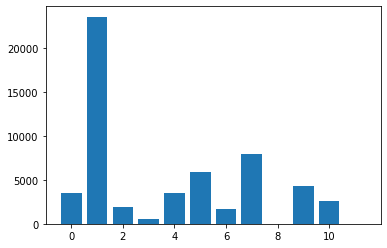

In [ ]:
import matplotlib.pyplot as plt

columns = ['todaycount','mean',	'min','max','cumdate','cumtrans','duration','size','year', 'month',	'day','weekend']
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (columns[i],abs(v)))
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

In [ ]:
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.78
테스트 세트의 정확도 : 0.91
사용한 특성의 수 : 11
사용한 max_iter : 424


In [ ]:
predict_y = lasso.predict(X_test)
pd.DataFrame([predict_y, y_test]).transpose()

0              1
0    188746.967589  193764.705882
1    191129.858170  193764.705882
2    190537.591831  190687.500000
3    190806.756242  193764.705882
4    190214.489903  190687.500000
..             ...            ...
917  219242.532606  216000.000000
918  218650.266267  215000.000000
919  218057.999927  219500.000000
920  221171.009699  215000.000000
921  220578.743359  219500.000000

[922 rows x 2 columns]

In [ ]:
X_test = pd.DataFrame(X_test, columns =['todaycount','mean',	'min','max','cumdate','cumtrans','duration','size','year', 'month',	'day','weekend'] )

In [ ]:
X_test['preedict'] = predict_y

In [ ]:
X_test['targetprice'] = y_test
X_test

todaycount      mean       min       max   cumdate  cumtrans  duration  \
0      0.909865 -1.273535 -1.246346 -1.376087  1.169990  2.580360  1.609093   
1      0.381916 -1.262794 -1.276499 -1.376087  1.214388  2.622768  1.260719   
2      0.381916 -1.262794 -1.276499 -1.376087  1.214388  2.622768  1.609093   
3      0.865869 -1.201371 -1.246346 -1.237511  1.258786  2.680726  0.912345   
4      0.865869 -1.201371 -1.246346 -1.237511  1.258786  2.680726  1.260719   
..          ...       ...       ...       ...       ...       ...       ...   
917   -0.849964 -0.541171 -0.371906 -0.738638  2.102343 -0.385393 -1.526276   
918   -0.849964 -0.541171 -0.371906 -0.738638  2.102343 -0.385393 -1.177901   
919   -0.849964 -0.541171 -0.371906 -0.738638  2.102343 -0.385393 -0.829527   
920   -0.761972 -0.570466 -0.432212 -0.794068  2.146740 -0.379739 -1.526276   
921   -0.761972 -0.570466 -0.432212 -0.794068  2.146740 -0.379739 -1.177901   

         size  year     month       day   weekend       preedict  \
0   -0.827941   0.0  1.319308  0.124152 -0.620537  188746.967589   
1   -0.827941   0.0  1.319308  0.238673 -0.620537  191129.858170   
2   -0.827941   0.0  1.319308  0.238673 -0.620537  190537.591831   
3   -0.827941   0.0  1.319308  0.353194  1.611508  190806.756242   
4   -0.827941   0.0  1.319308  0.353194  1.611508  190214.489903   
..        ...   ...       ...       ...       ...            ...   
917  0.860919   0.0  1.319308  1.498406 -0.620537  219242.532606   
918  0.860919   0.0  1.319308  1.498406 -0.620537  218650.266267   
919  0.860919   0.0  1.319308  1.498406 -0.620537  218057.999927   
920  0.860919   0.0  2.559108 -1.593665 -0.620537  221171.009699   
921  0.860919   0.0  2.559108 -1.593665 -0.620537  220578.743359   

       targetprice  
0    193764.705882  
1    193764.705882  
2    190687.500000  
3    193764.705882  
4    190687.500000  
..             ...  
917  216000.000000  
918  215000.000000  
919  219500.000000  
920  215000.000000  
921  219500.000000  

[922 rows x 14 columns]

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,predict_y))) 

9899.603680259961


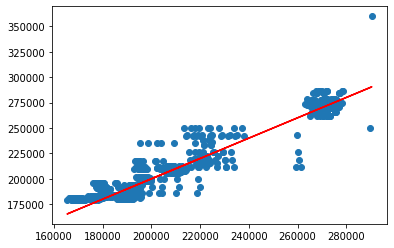

In [ ]:
plt.scatter(predict_y, y_test)
plt.plot(predict_y, predict_y, color = 'red',label = 'x=y')

#흠....

In [ ]:
from pycaret.regression import *
model = setup( train_data.drop(['test', 'date'], axis=1), target = 'targetprice', 
              fold_shuffle=True,
              fold=15, 
              session_id=530,
              remove_multicollinearity = True,
              normalize= True,
              n_jobs = -1,
              silent = True,
              combine_rare_levels = True,
              ignore_low_variance = True ) 

Description             Value
0                               session_id               530
1                                   Target       targetprice
2                            Original Data        (8514, 13)
3                           Missing Values              True
4                         Numeric Features                 9
5                     Categorical Features                 3
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (5959, 31)
10                    Transformed Test Set        (2555, 31)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                15
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              dae1
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance              True
35                     Combine Rare Levels              True
36                    Rare Level Threshold               0.1
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity              True
41             Multicollinearity Threshold               0.9
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [ ]:
top5_model = compare_models(round=4, n_select = 5, sort='RMSE')

Model           MAE           MSE  \
lightgbm  Light Gradient Boosting Machine  5.748312e+03  1.439199e+08   
rf                Random Forest Regressor  5.460255e+03  1.549332e+08   
knn                 K Neighbors Regressor  6.241642e+03  1.598554e+08   
et                  Extra Trees Regressor  5.431750e+03  1.856084e+08   
gbr           Gradient Boosting Regressor  6.732285e+03  1.753235e+08   
llar         Lasso Least Angle Regression  8.138363e+03  2.148527e+08   
ridge                    Ridge Regression  8.130907e+03  2.139023e+08   
lasso                    Lasso Regression  8.151386e+03  2.142478e+08   
br                         Bayesian Ridge  8.142032e+03  2.146722e+08   
lr                      Linear Regression  8.156092e+03  2.142040e+08   
huber                     Huber Regressor  7.789704e+03  2.201206e+08   
par          Passive Aggressive Regressor  7.816670e+03  2.267905e+08   
omp           Orthogonal Matching Pursuit  8.850342e+03  2.536040e+08   
dt                Decision Tree Regressor  7.112824e+03  2.840537e+08   
en                            Elastic Net  1.142513e+04  3.261564e+08   
ada                    AdaBoost Regressor  1.108604e+04  3.367427e+08   
dummy                     Dummy Regressor  2.662822e+04  1.233974e+09   
lar                Least Angle Regression  2.673074e+07  1.425432e+16   

                  RMSE            R2   RMSLE      MAPE  TT (Sec)  
lightgbm  1.103884e+04  8.924000e-01  0.2367  299.0074    0.1067  
rf        1.144135e+04  8.842000e-01  0.2413  300.9350    3.0347  
knn       1.184834e+04  8.789000e-01  0.2403  298.9061    0.0753  
et        1.244285e+04  8.599000e-01  0.2906  309.7188    2.4413  
gbr       1.250468e+04  8.665000e-01  0.2458  294.5021    0.5873  
llar      1.399539e+04  8.346000e-01  0.2465  319.7632    0.0187  
ridge     1.399696e+04  8.352000e-01  0.2465  315.9890    0.0127  
lasso     1.402678e+04  8.348000e-01  0.2467  313.9831    0.0547  
br        1.402763e+04  8.346000e-01  0.2467  315.8389    0.0200  
lr        1.403075e+04  8.348000e-01  0.2467  313.2720    0.0140  
huber     1.410098e+04  8.310000e-01  0.2470  331.7077    0.1707  
par       1.428208e+04  8.259000e-01  0.2476  338.9592    0.1807  
omp       1.522424e+04  8.040000e-01  0.2515  343.5420    0.0127  
dt        1.586413e+04  7.808000e-01  0.4728  353.0803    0.0773  
en        1.754941e+04  7.452000e-01  0.2569  339.6346    0.0147  
ada       1.811983e+04  7.276000e-01  0.2692  288.4042    0.2160  
dummy     3.503658e+04 -3.500000e-03  0.3161  312.9153    0.0100  
lar       3.193812e+07 -1.260211e+07  0.9695  421.8865    0.0187

In [ ]:
temp = [top5_model[1], top5_model[2], top5_model[0]]           
blender = blend_models(temp, optimize = 'RMSE')
prediction = predict_model(blender, data=test_data.drop(['test', 'date', 'targetprice'], axis=1))

MAE           MSE        RMSE      R2   RMSLE       MAPE
Fold                                                                
0     4882.5124  6.059967e+07   7784.5789  0.9359  0.0334     0.0207
1     5163.2872  6.729138e+07   8203.1321  0.9296  0.0348     0.0220
2     5603.5544  1.722951e+08  13126.1237  0.8827  0.5797   518.3560
3     5569.6627  7.304350e+07   8546.5490  0.9398  0.0352     0.0231
4     5481.8219  8.645379e+07   9298.0531  0.9208  0.0419     0.0227
5     5233.9910  5.974903e+07   7729.7499  0.9469  0.0317     0.0220
6     5593.0808  1.804956e+08  13434.8635  0.8692  0.0563     0.0226
7     7146.5789  5.913317e+08  24317.3122  0.6335  1.1693  2303.6059
8     6548.2997  3.375772e+08  18373.2754  0.7599  0.8273  1155.1623
9     5198.4313  6.059075e+07   7784.0058  0.9520  0.0320     0.0216
10    6008.4141  1.861252e+08  13642.7707  0.8597  0.5803   516.8604
11    5150.8830  6.651113e+07   8155.4356  0.9448  0.0335     0.0215
12    5392.8081  8.782898e+07   9371.7119  0.9276  0.0394     0.0221
13    4808.0483  5.357973e+07   7319.8179  0.9526  0.0302     0.0203
14    4781.9599  5.288881e+07   7272.4695  0.9522  0.0304     0.0201
Mean  5504.2222  1.424241e+08  10957.3233  0.8938  0.2370   299.6149
Std    625.9428  1.419685e+08   4728.7600  0.0858  0.3556   623.4475

In [ ]:
prediction['targetprice'] = y_test

In [ ]:
prediction

todaycount           mean       min       max  cumdate  cumtrans  \
0            42  191000.000000  184000.0  196000.0       61      2500   
1            30  191366.666667  183000.0  196000.0       62      2530   
2            30  191366.666667  183000.0  196000.0       62      2530   
3            41  193463.414634  184000.0  201000.0       63      2571   
4            41  193463.414634  184000.0  201000.0       63      2571   
..          ...            ...       ...       ...      ...       ...   
917           2  216000.000000  213000.0  219000.0       82       402   
918           2  216000.000000  213000.0  219000.0       82       402   
919           2  216000.000000  213000.0  219000.0       82       402   
920           4  215000.000000  211000.0  217000.0       83       406   
921           4  215000.000000  211000.0  217000.0       83       406   

     duration   size  year  month   day  weekend          Label    targetprice  
0          10  255.0  22.0    6.0  16.0      0.0  192238.105723  193764.705882  
1           9  255.0  22.0    6.0  17.0      0.0  192526.428975  193764.705882  
2          10  255.0  22.0    6.0  17.0      0.0  192370.342878  190687.500000  
3           8  255.0  22.0    6.0  18.0      1.0  193547.931409  193764.705882  
4           9  255.0  22.0    6.0  18.0      1.0  192812.666804  190687.500000  
..        ...    ...   ...    ...   ...      ...            ...            ...  
917         1  295.0  22.0    6.0  28.0      0.0  219826.242123  216000.000000  
918         2  295.0  22.0    6.0  28.0      0.0  221898.238005  215000.000000  
919         3  295.0  22.0    6.0  28.0      0.0  221233.163780  219500.000000  
920         1  295.0  22.0    7.0   1.0      0.0  220445.056578  215000.000000  
921         2  295.0  22.0    7.0   1.0      0.0  225404.368558  219500.000000  

[922 rows x 14 columns]